In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import os
import cv2
import numpy as np
import random
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [167]:
# Preprocessing function
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (112, 112))
    img = img.flatten()
    return img

# SVM on Original Data

In [168]:
data = []
label = []
file_paths = []
for c in [0,1]:
    images = os.path.join("/content/drive/MyDrive/brain_dataset/", str(c))
    for file in os.listdir(images):
        file_path = os.path.join(images, file)
        data.append(preprocess_image(file_path))
        label.append(c)
        file_paths.append(file_path)

data = np.array(data)
label = np.array(label)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, stratify = label, random_state=0)

In [170]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train, random_state=0)

In [171]:
print(X_tr.shape, y_tr.shape)

(141, 12544) (141,)


Selecting the best parameters using GridSearch

In [173]:
parameters = {'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'sigmoid', 'rbf'], 
              'gamma': [0.1, 0.01, 0.001, 0.0001]}


In [174]:
clf = svm.SVC(random_state=0)
grid_search = GridSearchCV(clf, parameters, refit=True,scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_tr, y_tr)
print("Best Parameters:", grid_search.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: SVC(C=0.1, gamma=0.1, kernel='linear', random_state=0)


In [175]:
best_clf = svm.SVC(C= 0.1, gamma= 0.1, kernel= 'linear', random_state=0)
best_clf.fit(X_tr, y_tr)
y_pred = best_clf.predict(X_val)
print("Acc train = ", accuracy_score(y_tr,best_clf.predict(X_tr)))
print("Acc val = ", accuracy_score(y_val,y_pred))

Acc train =  1.0
Acc val =  0.7777777777777778


In [176]:
y_pred = best_clf.predict(X_test)
print("Acc tr = ", accuracy_score(y_tr,best_clf.predict(X_tr)))
print("Acc tst = ", accuracy_score(y_test,y_pred))

Acc tr =  1.0
Acc tst =  0.6710526315789473


In [177]:
y_pred = best_clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[16 13]
 [12 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        29
           1       0.73      0.74      0.74        47

    accuracy                           0.67        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.67      0.67      0.67        76



In [178]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

Sensitivity: 0.7446808510638298


In [179]:
correct = np.where(y_pred==y_test)[0]
print( "Found %d correct labels" % len(correct))
correct

Found 51 correct labels


array([ 0,  3,  4,  5,  6,  7,  9, 10, 12, 14, 15, 17, 18, 21, 24, 25, 28,
       30, 31, 33, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 51, 52, 53,
       54, 55, 56, 57, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 74, 75])

In [180]:
correct[0:9]

array([ 0,  3,  4,  5,  6,  7,  9, 10, 12])

Found 51 correct labels


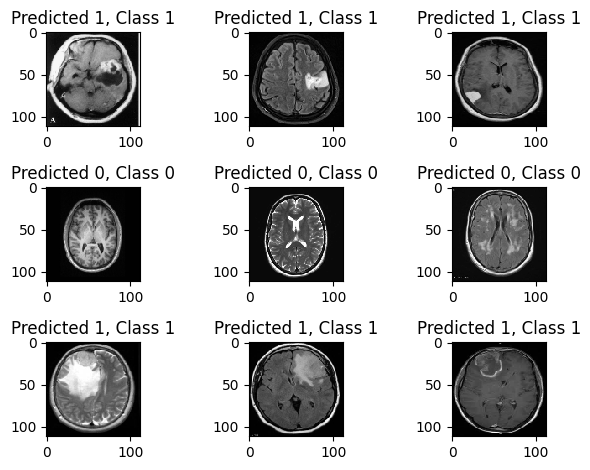

In [181]:
correct = np.where(y_pred == y_test)[0]
print("Found %d correct labels" % len(correct))
i = 0
for val in correct[:9]:
    plt.subplot(3, 3, i + 1)
    img = X_test[val].reshape(112, 112)  # Reshape the flattened image to 112x112 pixels
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[val], y_test[val]))
    i += 1
plt.tight_layout()

In [182]:
incorrect = np.where(y_pred!=y_test)[0]
print( "Found %d incorrect labels" % len(incorrect))
incorrect

Found 25 incorrect labels


array([ 1,  2,  8, 11, 13, 16, 19, 20, 22, 23, 26, 27, 29, 32, 34, 35, 39,
       46, 49, 50, 58, 60, 65, 72, 73])

Found 25 incorrect labels


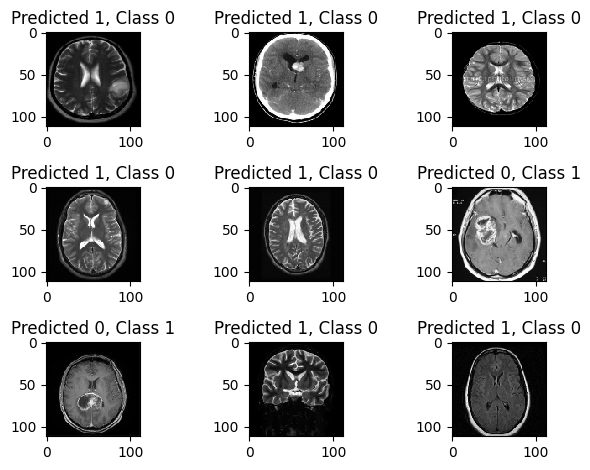

In [183]:
incorrect = np.where(y_pred != y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
i = 0
for val in incorrect[:9]:
    plt.subplot(3, 3, i + 1)
    img = X_test[val].reshape(112, 112)
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[val], y_test[val]))
    i += 1
plt.tight_layout()

In [184]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

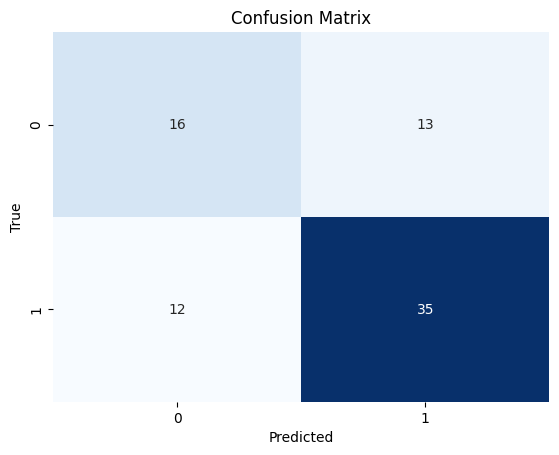

In [185]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# SVM on New Data

In [186]:
data2 = []
label2 = []
file_paths = []
for c in [0, 1]:
    images = os.path.join("/content/drive/MyDrive/brain_mixed/", str(c))
    for file in os.listdir(images):
        file_path = os.path.join(images, file)
        data2.append(preprocess_image(file_path))
        label2.append(c)
        file_paths.append(file_path)

data2 = np.array(data2)
label2 = np.array(label2)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(data2, label2, test_size=0.3, stratify = label2, random_state=0)

In [188]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train, random_state=0)

In [189]:
print(X_tr.shape, y_tr.shape)

(191, 12544) (191,)


In [190]:
best_clf2 = svm.SVC(C= 0.1, gamma= 0.1, kernel= 'linear', random_state=0)
best_clf2.fit(X_tr, y_tr)
y_pred = best_clf2.predict(X_val)
print("Acc tr = ", accuracy_score(y_tr,best_clf.predict(X_tr)))
print("Acc val = ", accuracy_score(y_val,y_pred))


Acc tr =  0.8219895287958116
Acc val =  0.6666666666666666


In [191]:
best_clf.fit(X_tr, y_tr)
y_pred = best_clf.predict(X_test)
print("Acc tr = ", accuracy_score(y_tr,best_clf.predict(X_tr)))
print("Acc test = ", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Acc tr =  1.0
Acc test =  0.6796116504854369
Confusion Matrix:
 [[27 14]
 [19 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62        41
           1       0.75      0.69      0.72        62

    accuracy                           0.68       103
   macro avg       0.67      0.68      0.67       103
weighted avg       0.69      0.68      0.68       103



In [192]:
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

Sensitivity: 0.6935483870967742


In [193]:
correct = np.where(y_pred==y_test)[0]
print( "Found %d correct labels" % len(correct))
correct

Found 70 correct labels


array([  0,   1,   2,   3,   4,   6,   8,   9,  10,  12,  15,  16,  19,
        20,  24,  25,  26,  27,  28,  29,  35,  37,  38,  39,  41,  42,
        44,  45,  48,  49,  50,  51,  52,  53,  54,  57,  58,  59,  60,
        61,  63,  64,  67,  68,  69,  70,  72,  73,  74,  76,  77,  79,
        80,  81,  82,  83,  84,  87,  89,  91,  92,  93,  95,  96,  97,
        98,  99, 100, 101, 102])

Found 70 correct labels


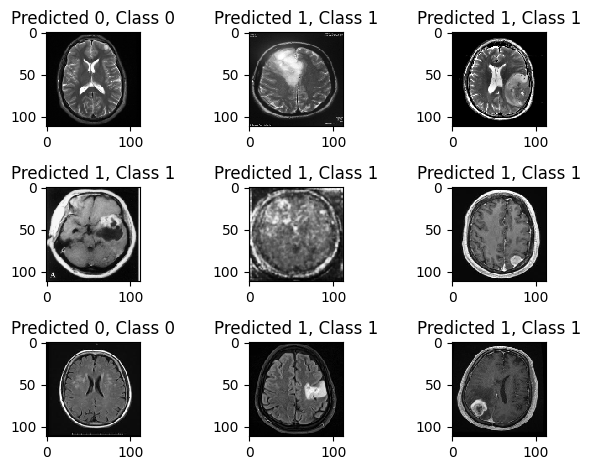

In [194]:
correct = np.where(y_pred == y_test)[0]
print("Found %d correct labels" % len(correct))
i = 0
for val in correct[:9]:
    plt.subplot(3, 3, i + 1)
    img = X_test[val].reshape(112, 112) 
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[val], y_test[val]))
    i += 1
plt.tight_layout()

In [195]:
incorrect = np.where(y_pred!=y_test)[0]
print( "Found %d incorrect labels" % len(incorrect))
incorrect

Found 33 incorrect labels


array([ 5,  7, 11, 13, 14, 17, 18, 21, 22, 23, 30, 31, 32, 33, 34, 36, 40,
       43, 46, 47, 55, 56, 62, 65, 66, 71, 75, 78, 85, 86, 88, 90, 94])

Found 33 incorrect labels


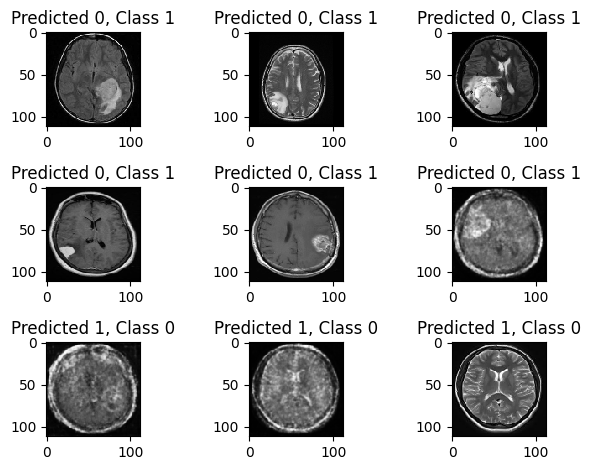

In [196]:
incorrect = np.where(y_pred != y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
i = 0
for val in incorrect[:9]:
    plt.subplot(3, 3, i + 1)
    img = X_test[val].reshape(112, 112)
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[val], y_test[val]))
    i += 1
plt.tight_layout()

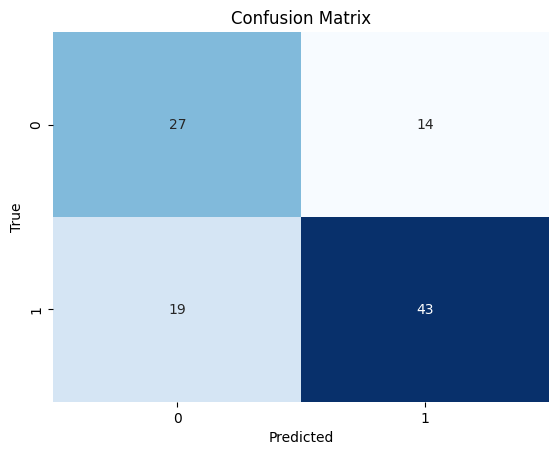

In [197]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()